## Why Microsoft ?

Microsoft is today one of the largest technology companies with more than 163,000 employees worldwide. It is known for the Windows operating system which is one of the most popular computer operating systems. Windows 10 is one of the operating systems that so many people love about Microsoft. When Microsoft released Windows 10, it was announced that it would be the last version of windows and then Microsoft will only work on its updates. But now Microsoft has once again garnered a lot of attention from the world as the release of Windows 11 is just around the corner. So now will be a good time to predict Microsoft’s stock price as it is getting a lot of attention.

## About Dataset

[Microsoft Corporation (MSFT) Dataset](https://in.finance.yahoo.com/quote/MSFT/history?p=MSFT)

## Importing the necessary Python libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

data = pd.read_csv("MSFT.csv")
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2020-07-13  214.479996  215.800003  206.500000  207.070007  205.084259   
1  2020-07-14  206.130005  208.850006  202.029999  208.350006  206.351974   
2  2020-07-15  209.559998  211.330002  205.029999  208.039993  206.044937   
3  2020-07-16  205.399994  205.699997  202.309998  203.919998  201.964462   
4  2020-07-17  204.470001  205.039993  201.389999  202.880005  200.934448   

     Volume  
0  38135600  
1  37591800  
2  32179400  
3  29940700  
4  31635300  


In this dataset, the Close column contains the values whose future values we want to predict. So let’s have a closer look at the historical close prices of Microsoft’s stock price:

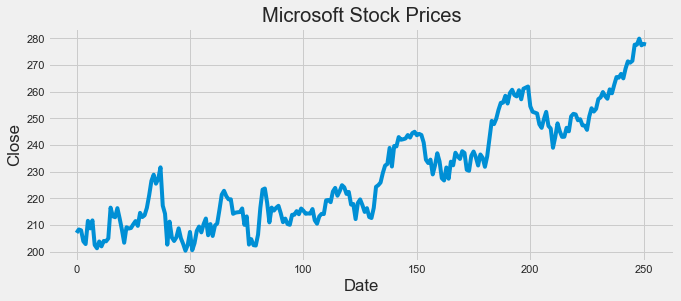

In [2]:
plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

Now let’s have a look at the correlation between the features of this dataset:

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.996066  0.995246  0.990163   0.990257 -0.312126
High       0.996066  1.000000  0.995413  0.995414   0.995386 -0.287948
Low        0.995246  0.995413  1.000000  0.996378   0.996517 -0.347630
Close      0.990163  0.995414  0.996378  1.000000   0.999868 -0.325178
Adj Close  0.990257  0.995386  0.996517  0.999868   1.000000 -0.326942
Volume    -0.312126 -0.287948 -0.347630 -0.325178  -0.326942  1.000000


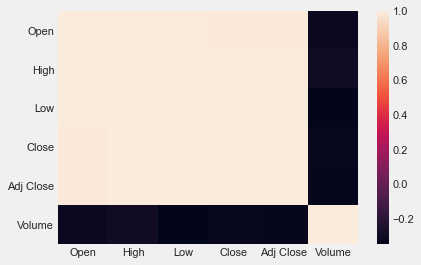

In [3]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

Preparing the data to fit into the machine learning model. In this step, I will first add the most important features to x and the target column to y, and then I will divide the dataset into training and test sets:

In [4]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Using the Decision Tree Regression Algorithm to train the Microsoft Stock Price prediction model and have a look at the predicted stock prices for the next 5 days:

In [5]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0      234.809998
1      205.369995
2      223.720001
3      232.330002
4      222.860001
